 파이썬 <머신러닝 완벽 가이드 개정 2판> 8장 p.534 - 538, p.550 - 565

 # CHAPTER 08. 텍스트 분류
---
## 08-06. 토픽 모델링(Topic Modeling) - 20 뉴스 그룹

   
## 08-08. 문서 유사도
- 문서 유사도 측정 방법 - 코사인 유사도
- 두 벡터 사잇각
- Opinion Review 데이터 세트를 이용한 문서 유사도 측정
- VADER를 이용한 감성 분석

## 08-09. 한글 텍스트 처리 - 네이버 영화 평점 감정 분석
- 한글 NLP 처리의 어려움
- KoNLPy 소개
- 데이터 로딩

---

## 08-06. 토픽 모델링(Topic Modeling) - 20 뉴스 그룹

[정의]
- 토픽 모델링(Topic Modeling): 문서 집합에 숨어있는 주제를 찾아내는 것

[특징]
- 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출
- 머신러닝 기반의 토픽 모델링에 자주 사용되는 기법
   - LSA(Latent Semantic Analysis)
   - LDA(Latent Dirichlet Allocation)

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개의 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                             categories=cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english',
                             ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


CountVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터


In [4]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [5]:
# components_는 개별 토픽별로 각 word 피처가 얼마나 그 토픽에 할당됐는지에 대한 수치
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[2.69030238e+02, 1.87798026e+02, 7.09003824e+01, ...,
        1.22710343e+01, 1.06329639e+02, 7.25995512e+01],
       [1.25091799e-01, 2.46049106e+00, 1.25051902e-01, ...,
        2.80071176e+02, 1.25089783e-01, 5.05669662e+01],
       [1.33978420e+02, 1.25042012e-01, 9.98277256e+01, ...,
        1.25092219e-01, 3.31078261e+01, 1.25028398e-01],
       ...,
       [2.98813886e+01, 1.88071366e+01, 1.14748730e+01, ...,
        1.93022584e+01, 5.29368271e+00, 1.44478198e+01],
       [1.25074899e-01, 1.25105300e-01, 1.25004235e-01, ...,
        1.03576436e+02, 1.25100535e-01, 7.22276359e+01],
       [1.25172284e-01, 1.03967760e+00, 1.25221075e-01, ...,
        5.31740996e+01, 1.25025929e-01, 1.25062991e-01]])

In [7]:
# display_topic() 함수로 각 토픽별로 연관도가 높은 순으로 Word를 나열

def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_feature_names_out()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
10 year medical health 1993 20 12 disease cancer team patients research number new 11
Topic # 1
don just like know think good time ve does way really people want ll right
Topic # 2
image file jpeg output program gif images format files color entry use bit 03 02
Topic # 3
armenian armenians turkish people said turkey armenia government genocide turks muslim russian greek azerbaijan killed
Topic # 4
israel jews dos jewish israeli dos dos arab state people arabs palestinian adl ed anti peace
Topic # 5
edu com available graphics ftp window use mail data motif software version pub information server
Topic # 6
god people jesus church believe say christ does christian think christians did know bible man
Topic # 7
thanks use using does help like display need problem know server screen windows window program


## 08-08. 문서 유사도

### 문서 유사도 측정 방법 - 코사인 유사도
- 코사인 유사도: 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용

### 두 벡터 사잇각
- 유사도 (cos세타)
   - 두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것
   - 내적 결과를 총 벡터 크기로 정규화(L2 Norm)한 것

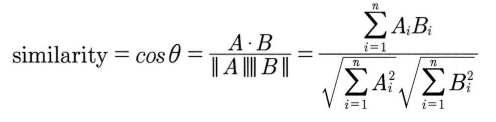

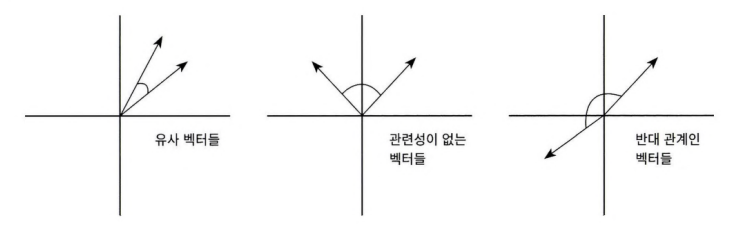

In [8]:
# 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 cos_similarity() 함수
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1)))) * np.sqrt(sum(np.square(v2)))
  similarity = dot_product / l2_norm

  return similarity

In [9]:
# doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [10]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫번째 문장과 두번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫번째 문장과 두번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 cosine 유사도:{0:.3f}'.format(similarity_simple))

문장 1, 문장 2 cosine 유사도:0.402


In [12]:
# 첫번째 문장과 세번째 문자의 유사도 측정
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1과 문장 3 cosine 유사도: {0:.3f}'.format(similarity_simple))

# 두번째 문장과 세번째 문자의 유사도 측정
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2과 문장 3 cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1과 문장 3 cosine 유사도: 0.404
문장 2과 문장 3 cosine 유사도: 0.456


In [13]:
# sklearn.metrics.pairwise.cosine_similarity API를 사용하여 첫번째 문서와 비교해 첫번째, 두번째, 세번째 문서와의 유사도 측정
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [14]:
# 비교 대상에서 기준 문서 제외
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [15]:
# cosine_similarity()는 쌍(pair) 코사인 유사도 값 제공
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
path = '/content/drive/MyDrive/ESAA_OB/Dataset/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})

# 텍스트 정규화 및 토큰화
def LemNormalize(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)  # nltk 토큰화 적용
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

# 빈 문서 제거
document_df = document_df.dropna(subset=['opinion_text'])

# Ensure the 'opinion_text' column contains strings
document_df['opinion_text'] = document_df['opinion_text'].astype(str)

document_df = document_df[document_df['opinion_text'].str.len() > 0]

# TF-IDF 벡터화 (stop_words 제거, min_df 완화)
tfidf_vect = TfidfVectorizer(tokenizer=None, preprocessor=None,
                             ngram_range=(1,2), min_df=0.01, max_df=0.95)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])


# KMeans 클러스터링
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0, n_init='auto')
km_cluster.fit(feature_vect)

# 클러스터 결과 저장
document_df['cluster_label'] = km_cluster.labels_

# 희소 행렬 변환 후 cluster_centers_ 접근
cluster_centers = km_cluster.cluster_centers_

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('#### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도 ####')

'''document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫번째 문서와 다른 문서 간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링된 문서들의 DataFrame Index: Index([0, 1, 3, 5, 6, 9, 18, 19, 28, 30, 35, 39, 40, 41, 43, 44, 46], dtype='int64')
#### 비교 기준 문서명 battery-life_ipod_nano_8gb 와 타 문서 유사도 ####
[[1.         0.02497058 0.76505978 0.02823497 0.03096098 0.64242846
  0.09660642 0.01829828 0.03557674 0.0325853  0.19236279 0.01518405
  0.16542054 0.16440801 0.04177963 0.0270403  0.15344971]]


가장 유사도가 큰 파일명 및 유사도:
 filename      fonts_amazon_kindle
similarity                0.76506
Name: 19, dtype: object


Text(0.5, 1.0, 'battery-life_ipod_nano_8gb')

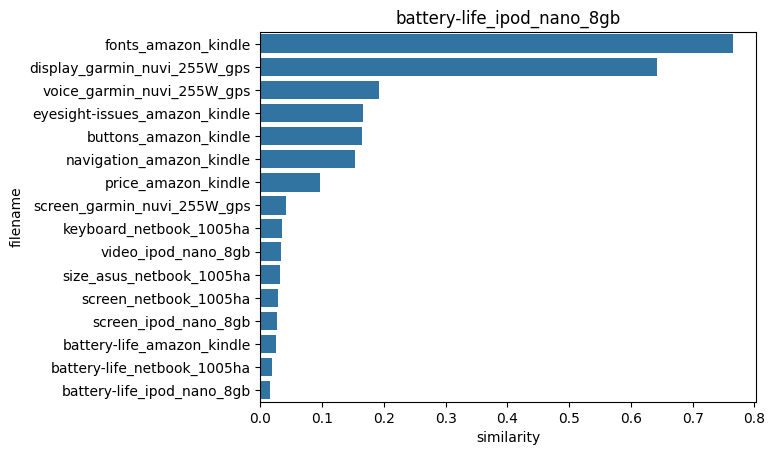

In [31]:
# 첫번째 문서와 다른 문서 간에 유사도가 높은 순으로 이를 정렬하고 시각화
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:, ::1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0, :])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

## 08-09. 한글 텍스트 처리 - 네이버 영화 평점 감정 분석


### 한글 NLP 처리의 어려움
- 한글 언어 처리는 영어 등의 라틴어 처리보다 어려움.
   - 불명확한 띄어쓰기
   - 다양한 조사로 인해 까다로운 어근 추출(Stemming/Lemmatization)

### KoNLPy 소개
[정의]

- KoNLPy: 파이썬의 대표적인 한글 형태소 패키지
- 형태소: 단어로서 의미를 가지는 최소 단위
- 형태소 분석(Morphological analysis): 말뭉치를 이러한 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업

In [32]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 29.1 MB/s eta 0:00:00


### 데이터 로딩

In [34]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [35]:
# 학습 데이터 세트의 0과 1의 Label 값 비율
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


In [36]:
import re

train_df = train_df.fillna('')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r"\d+", " ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'\d+', ' ', x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [39]:
# Twitter 객체의 morphs( ) 메서드를 이용하여 형태소 단어로 토큰화
from konlpy.tag import Twitter

twitter = Twitter()

def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화 해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

In [ ]:
# 사이킷런의 TfidfVectorizer을 이용해 TF-IDF 피처 모델을 생성
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morph() 객체를 이용한 tokenizer을 이용. ngram_range는 (1, 2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C': [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

In [ ]:
# 최종 감성 분석 예측 수행
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함.
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))